## **Download Data**

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
%cd /content/drive/MyDrive/UDEMY

/content/drive/MyDrive/UDEMY


## **Import Libraries**

In [93]:
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tqdm import tqdm
from numpy.random import seed
from time import time

seed(11)

# **Load Data**

In [95]:
##################### X data (1096, 715, 102) Hyperspectral satellite (1096*715, 102)
data = loadmat('Pavia.mat')['pavia']

##################### Y data (labels)
gt = loadmat('Pavia_gt.mat')['pavia_gt']

print(f'Data Shape: {data.shape[:-1]}\nNumber of Bands {data.shape[-1]}')

Data Shape: (1096, 715)
Number of Bands 102


In [96]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

In [97]:
df.head()


,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band94,band95,band96,band97,band98,band99,band100,band101,band102,class
0,854,601,350,266,138,118,178,194,257,269,...,3759,3773,3779,3752,3690,3671,3664,3636,3643,0
1,527,642,575,294,123,168,207,154,209,299,...,3873,3902,3921,3861,3854,3882,3834,3725,3768,0
2,374,322,179,87,169,268,360,339,286,309,...,4443,4472,4428,4353,4306,4284,4318,4311,4321,0
3,706,520,560,572,425,243,271,272,258,276,...,3972,4006,4032,3975,3946,3954,3944,3936,3939,0
4,1120,1027,592,414,407,463,417,365,332,334,...,4502,4485,4479,4445,4364,4290,4268,4235,4272,0


In [98]:

print(1096*715), df.shape


783640


(None, (783640, 103))

# **Data Visualization**

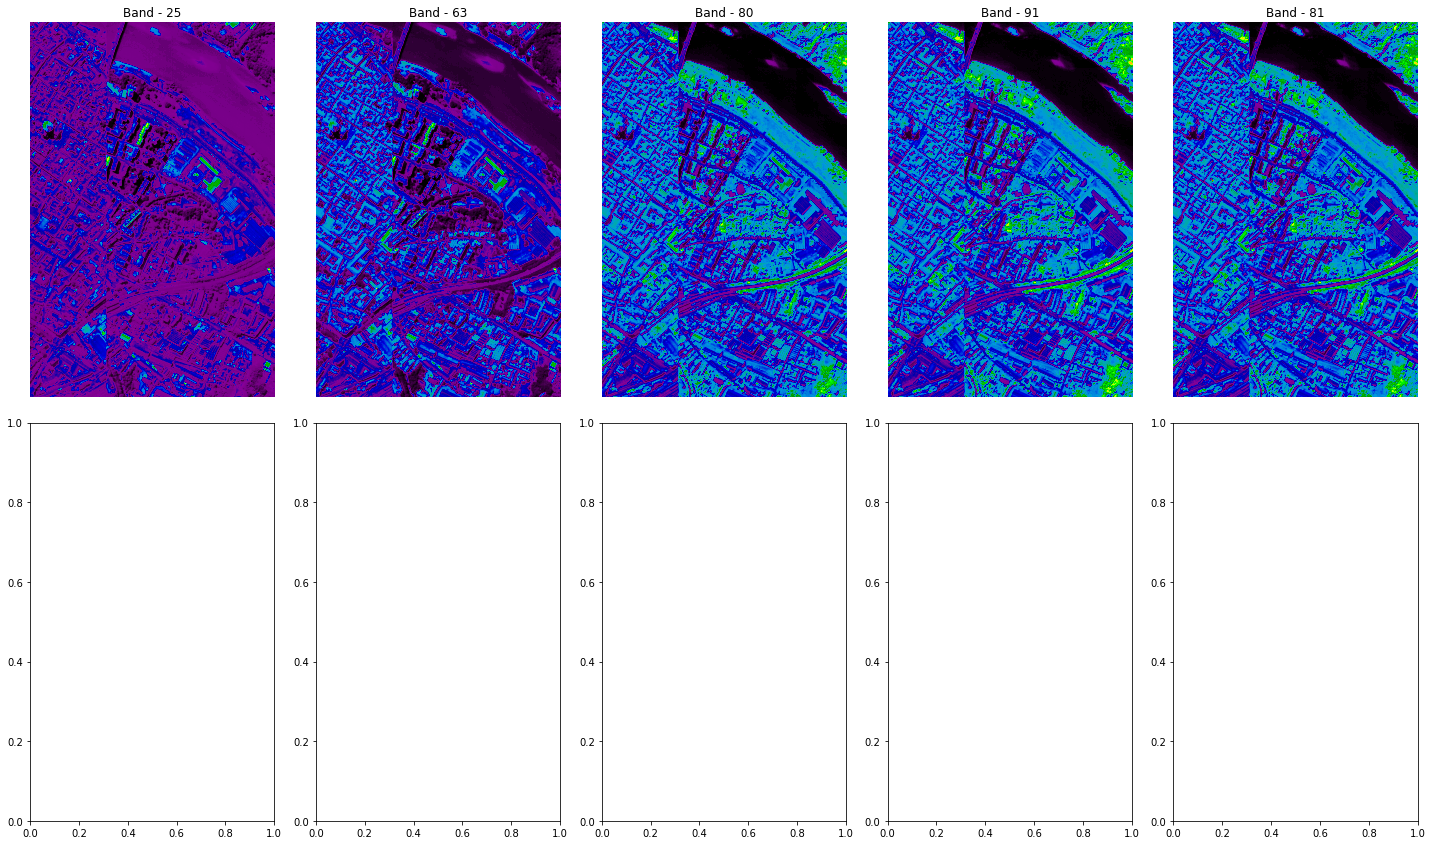

<Figure size 432x288 with 0 Axes>

In [99]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

  plt.tight_layout()
  plt.show()